<div style="border: 1px solid black">
<b><center><font size="4">Text2Analytics</font></center></b>

<b><center><font size="2">5 - Text Similarity</font></center></b>

<b><center><font size="1">Polly Fuzzy</font></center></b>
</div>

**Notebook Developed by**: [Ricardo Campos](http://www.ccc.ipt.pt/~ricardo)<br>
**email:**  ricardo.campos@ipt.pt<br>
**Affiliation:** *Assistant Professor* @ [Polytechnic Institute of Tomar](http://portal2.ipt.pt/en/);
*Researcher* @ [LIAAD](https://www.inesctec.pt/en/centres/liaad)-[INESC TEC](https://www.inesctec.pt/en)

<hr>

<p><a href="PolyFuzzy.ipynb" title="Download Notebook" download><img src="../../images/download.jpg" align = "left" width="50" height="50" alt="Download Notebook"></a></p>
<p>&nbsp;</p>
<p>&nbsp;</p>

<hr>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Installation" data-toc-modified-id="Installation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Installation</a></span></li><li><span><a href="#Overview" data-toc-modified-id="Overview-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Models" data-toc-modified-id="Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#RapidFuzz" data-toc-modified-id="RapidFuzz-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>RapidFuzz</a></span></li><li><span><a href="#Edit-Distance" data-toc-modified-id="Edit-Distance-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Edit Distance</a></span></li><li><span><a href="#TF.IDF-character-n-grams" data-toc-modified-id="TF.IDF-character-n-grams-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>TF.IDF character n-grams</a></span></li><li><span><a href="#Embeddings" data-toc-modified-id="Embeddings-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Embeddings</a></span></li></ul></li><li><span><a href="#Multiple-Models" data-toc-modified-id="Multiple-Models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Multiple Models</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plots</a></span></li><li><span><a href="#Custom-Models" data-toc-modified-id="Custom-Models-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Custom Models</a></span></li></ul></div>

# PolyFuzzy

[PolyFuzzy](https://github.com/MaartenGr/PolyFuzz) is a framework that allows you to quickly use common string matching techniques whilst still giving you the ability to customize and easily add models. It is a collection of techniques that are used to find the best match between two sets of strings. 

Currently, methods include a variety of edit distance measures, a character-based n-gram TF-IDF, word embedding techniques such as FastText and GloVe, and 🤗 transformers embeddings.

Notebook baseado neste [artigo](https://towardsdatascience.com/string-matching-with-bert-tf-idf-and-more-274bb3a95136)

Documentação: https://maartengr.github.io/PolyFuzz/

## Installation

<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
A execução de código neste notebook deverá ser precedida da criação de um ambiente virtual a partir do qual o package PolyFuzzy deverá ser instalado.
</div>
<hr/>

Para criar o ambiente virtual:

```
conda create -n TextSimilarity_PolyFuzzy
conda activate TextSimilarity_PolyFuzzy
conda install pip
conda install jupyter
pip install polyfuzz
pip install git+https://github.com/jamesturk/jellyfish
pip install polyfuzz[flair]
pip install --user ipykernel
python -m ipykernel install --user --name=TextSimilarity_PolyFuzzy
```

Para eliminar o ambiente virtual:

```
conda deactivate
conda env remove -n TextSimilarity_PolyFuzzy
jupyter kernelspec uninstall textsimilarity_polyfuzzy
```

## Overview

De uma forma mais genérica o PolyFuzzy pode ser usado para encontrar os itens mais similares a partir de um conjunto de elementos pertencentes a duas listas de strings:

In [1]:
from_list = ["apple", "apples", "appl", "recal", "house", "similarity"]
to_list = ["apple", "apples", "mouse"]

Basicamente o sistema vai olhar para a lista base (`from_list`) - composta por 6 elementos) - e vai tentar aferir, de entre uma segunda lista (`to_list`), quais os elementos mais similares com cada um desses 6 elementos. Nota: resultados devolvidos num pandas dataframe.

In [3]:
from polyfuzz import PolyFuzz

model = PolyFuzz("EditDistance")
model.match(from_list, to_list)
model.get_matches()

,From,To,Similarity
0,apple,apple,1.00
1,apples,apples,1.00
2,appl,apples,0.90
3,recal,apple,0.40
4,house,mouse,0.80
5,similarity,apple,0.18


Naturalmente podemos assumir um cenário onde o `to_list` é composto apenas por um elemento a ser comparado com um conjunto de outros tantos elementos existentes na `from_list`. Um exemplo concreto passaria por tentar entender a similaridade entre uma query formulada por um utilizador ('apple' na `to_list`) e um conjunto de queries formuladas no passado por outros tantos utilizadores (todos os elementos constantes da `from_list`). Ou a similaridade existente entre uma marca `apple` e um conjunto de outras tantas marcas.

Note-se que nada impede o sistema de ter como entradas na lista, palavras formadas por mais do que um token (incluindo frases ou textos).

In [4]:
from polyfuzz import PolyFuzz

from_list = ["apple", "apples", "appl", "recal", "house", "similarity"]
to_list = ["apple"]

model = PolyFuzz("EditDistance")
model.match(from_list, to_list)
model.get_matches()

,From,To,Similarity
0,apple,apple,1.000000
1,apples,apple,0.909091
2,appl,apple,0.888889
3,recal,apple,0.400000
4,house,apple,0.200000
5,similarity,apple,0.180000


## Models

Presentemente os seguintes modelos são instalados no PolyFuzzy:

- RapidFuzz
- EditDistance
- TF.IDF character n-grams
- Embeddings: FastText, GloVe, Transformers

### RapidFuzz

The most often used technique for calculating the edit distance between strings is Levenshtein. Although [FuzzyWuzzy](https://github.com/seatgeek/fuzzywuzzy) is one of the most commonly used implementations of Levenshtein, it has a GPL2 license which can be a bit restrictive in some cases.

Fortunately, there is a faster version out there with an MIT license, namely [RapidFuzz](https://github.com/maxbachmann/rapidfuzz) which is quickly accessible in PolyFuzz:

As you can see, we simply call RapidFuzz from polyfuzz.models and pass it through a PolyFuzz instance. 

In [10]:
from polyfuzz import PolyFuzz
from polyfuzz.models import RapidFuzz

from_list = ["apple", "apples", "appl", "recal", "house", "similarity"]
to_list = ["apple"]

matcher = RapidFuzz(n_jobs=1)
model = PolyFuzz(matcher)
model.match(from_list, to_list)
model.get_matches()

,From,To,Similarity
0,apple,apple,1.000000
1,apples,apple,0.909091
2,appl,apple,0.888889
3,recal,apple,0.400000
4,house,apple,0.200000
5,similarity,apple,0.180000


A especificação do parâmetro `score_cutoff=0.8` tem como efeito retornar uma similaridade 0 sempre que o valor de similaridade for inferior a 0.8.

In [11]:
from polyfuzz import PolyFuzz
from polyfuzz.models import RapidFuzz

from_list = ["apple", "apples", "appl", "recal", "house", "similarity"]
to_list = ["apple"]

matcher = RapidFuzz(n_jobs=1, score_cutoff=0.8)
model = PolyFuzz(matcher)
model.match(from_list, to_list)
model.get_matches()

,From,To,Similarity
0,apple,apple,1.000000
1,apples,apple,0.909091
2,appl,apple,0.888889
3,recal,None,0.000000
4,house,None,0.000000
5,similarity,None,0.000000


### Edit Distance

Although RapidFuzz is a nice implementation, what if you want to use any other edit distance algorithm? There are plenty of use-cases where Levenshtein might not be the answer.

For those cases, PolyFuzz allows you to use the EditDistance model from polyfuzz.models to pass in any distance function. As long as that distance function takes in two strings and spits out a float, you can pass anything!

In the example below, we are going to be using Jaro Winkler Similarity from the [jellyfish](https://github.com/jamesturk/jellyfish) package to create our custom scorer

In [13]:
from polyfuzz import PolyFuzz
from polyfuzz.models import EditDistance
from jellyfish import jaro_winkler_similarity

from_list = ["apple", "apples", "appl", "recal", "house", "similarity"]
to_list = ["apple"]

jellyfish_matcher = EditDistance(scorer=jaro_winkler_similarity)
model = PolyFuzz(jellyfish_matcher)
model.match(from_list, to_list)
model.get_matches()

,From,To,Similarity
0,apple,apple,1.000000
1,apples,apple,0.941176
2,appl,apple,0.929412
3,recal,apple,0.058824
4,house,apple,0.058824
5,similarity,apple,0.000000


### TF.IDF character n-grams

A nifty trick for calculating the similarity between two strings is by applying TF-IDF not on the entire words, but on character n-grams to create vector representations. Then, we can use cosine similarity to calculate how similar strings are to each other and extract the best match!

In [22]:
from polyfuzz import PolyFuzz
from polyfuzz.models import TFIDF

from_list = ["apple", "apples", "appl", "recal", "house", "similarity"]
to_list = ["apple"]

tfidf = TFIDF(n_gram_range=(3, 3))
model = PolyFuzz(tfidf)
model.match(from_list, to_list)
model.get_matches()

,From,To,Similarity
0,apple,apple,1.000
1,apples,apple,0.747
2,appl,apple,0.775
3,recal,None,0.000
4,house,None,0.000
5,similarity,None,0.000


### Embeddings

To play with embeddings one needs to import `Embeddings` from `polyfuzz.models` and import `embeddings` from the `Flair` package.

With Flair, we can use all 🤗 Transformers that are [publicly](https://huggingface.co/transformers/pretrained_models.html) available. We simply have to instantiate any Flair WordEmbedding method and pass it through PolyFuzzy. Then, a cosine similarity between the embeddings is calculated to extract the best matches.

You can use any of the WordEmbedding techniques implemented in Flair, such as FastText, GloVe, BERT, etc. Below, we are going to use BERT to embed the strings:

Para usar por exemplo o `FastText` procederíamos da seguinte forma:
```
fasttext_embeddings = WordEmbeddings('en-crawl')
fasttext = Embeddings(fasttext_embeddings, min_similarity=0, model_id="FastText")
```

In [2]:
from polyfuzz import PolyFuzz
from polyfuzz.models import Embeddings
from flair.embeddings import TransformerWordEmbeddings

from_list = ["apple", "apples", "appl", "recal", "house", "similarity"]
to_list = ["apple"]

embeddings = TransformerWordEmbeddings('bert-base-multilingual-cased')
bert = Embeddings(embeddings, min_similarity=0, model_id="BERT")

model = PolyFuzz(bert)
model.match(from_list, to_list)
model.get_matches()

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,From,To,Similarity
0,apple,apple,1.000
1,apples,apple,0.978
2,appl,apple,0.962
3,recal,apple,0.621
4,house,apple,0.575
5,similarity,apple,0.541


## Multiple Models

One great feature of PolyFuzz is the ability to match, group, and visualize multiple models within a single PolyFuzz instance. This allows you to quickly compare models and decide for yourself which, or which combination, you are going to use.

In the example below, we will be comparing Editistance, TF-IDF, and Embeddings with each other:

In [6]:
from polyfuzz.models import EditDistance, TFIDF, Embeddings
from flair.embeddings import TransformerWordEmbeddings

from_list = ["apple", "apples", "appl", "recal", "house", "similarity"]
to_list = ["apple"]

embeddings = TransformerWordEmbeddings('bert-base-multilingual-cased')
bert = Embeddings(embeddings, min_similarity=0, model_id="BERT")
tfidf = TFIDF(min_similarity=0, model_id="TF-IDF")
edit = EditDistance(model_id="EditDistance")

string_models = [bert, tfidf, edit]
model = PolyFuzz(string_models)
model.match(from_list, to_list)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In order to access the results of a specific model, call get_matches with the correct id:

In [12]:
model.get_matches("BERT")

,From,To,Similarity
0,apple,apple,1.000
1,apples,apple,0.978
2,appl,apple,0.962
3,recal,apple,0.621
4,house,apple,0.575
5,similarity,apple,0.541


## Plots

A título de curiosidade é possível observar o trade-off entre a similaridade mínima (denominada de precision) e o número de resultados devolvidos com uma similaridade superior a essa similaridade (denominada de recall). Nota: este plot não deve ser confundido com as habituais precision/recall curves da área de Information Retrieval (que obrigam à existência de um ground-truth). Na prática este plot serve apenas para entender a linha de corte na definição do valor de similaridade mínimo. Por exemplo (e focando no Bert) é possível observar que se a similaridade mínima (denominada de precision) for igual a 1, o recall, ou seja, o número de elementos devolvidos com essa similaridade é de 0.16 (decorrente de apenas ser devolvido uma única comparação com similaridade igual a 1, de entre as 6 comparações realizadas).

Por outro lado, no plot do lado direito é possível observar a distribuição das frequências. Observa-se por exemplo que a maior parte das similaridades devolvidas pelo Bert concentra-se acima de valores superiores a .50

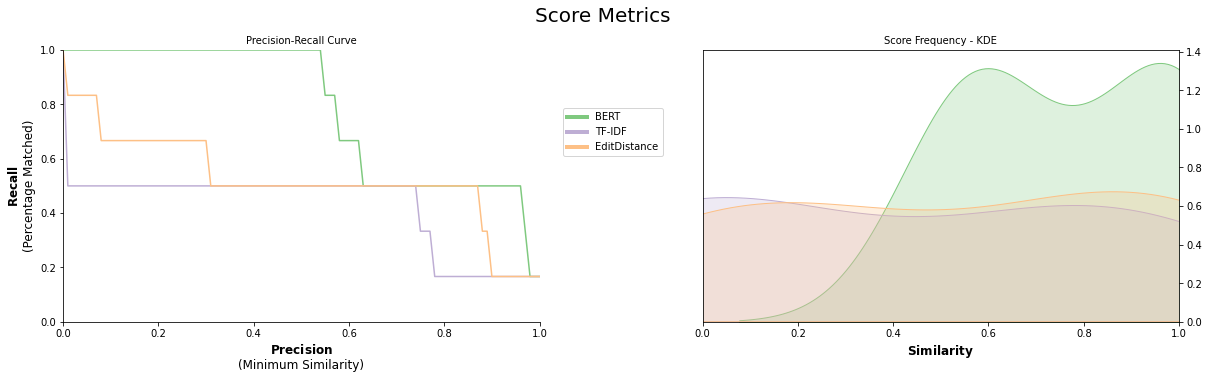

In [8]:
model.visualize_precision_recall(kde=True)

## Custom Models

Este package oferece também a possibilidade de integrar modelos desenvolvidos por nós próprios. Veja como aqui: https://github.com/MaartenGr/PolyFuzz